# **Part 2: AI Performance Challenge** 
## Problem Framing

### **Goal**

- Develop a predictive model that accurately identifies customers at risk of leaving the company (churn) based on the provided variables. 
- Perform a thorough exploratory analysis of the provided customer data to gain insights into the behavior and characteristics of the customers.

### **Type of Problem**

This is a **binary classification** problem, where the target variable is whether a customer has churned (1 = customer left / likely to leave, 0 = stays)

## Data Preparation
### **Loading Libraries and Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
import joblib




warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('../data/raw/loblaws.xlsx', sheet_name='E Comm')
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


### **EDA before Cleaning**

- Dataset Overview: Check shape, head, summary statistics, and missing values.
- Target Distribution: Plot churn frequency.
- Numeric Features: Visualize distributions using histograms and detect outliers with boxplots.
- Categorical Features: Use countplots to explore category frequencies.

In [3]:
#  Exploratory Data Analysis
# ==========================================================

# Config visualization settings
plt.style.use('ggplot')
sns.set_palette("Set2")

# Overview of the dataset
print("Shape:", data.shape)
display(data.describe(include='all'))
print("\nMissing values:\n", data.isna().sum())

Shape: (5630, 20)


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630,5630.000000,5379.000000,5630,5630,5375.000000,5630.000000,5630,5630.000000,5630,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
unique,NaN,NaN,NaN,3,NaN,NaN,7,2,NaN,NaN,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,NaN,Debit Card,Male,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2765,NaN,NaN,2314,3384,NaN,NaN,2050,NaN,2986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52815.500000,0.168384,10.189899,NaN,1.654707,15.639896,NaN,NaN,2.931535,3.688988,NaN,3.066785,NaN,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,NaN,0.915389,8.531475,NaN,NaN,0.721926,1.023999,NaN,1.380194,NaN,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,NaN,1.000000,5.000000,NaN,NaN,0.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500



Missing values:
 CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


1. Several key numerical features (Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder) contain missing values and will require imputation before modeling.

2. The target variable Churn is imbalanced (≈17% churners), meaning class weighting or resampling may be necessary to improve model performance.

3. Many numerical variables are highly skewed (WarehouseToHome, CouponUsed, OrderCount, CashbackAmount), indicating the presence of outliers that may affect model training and require transformation or capping.

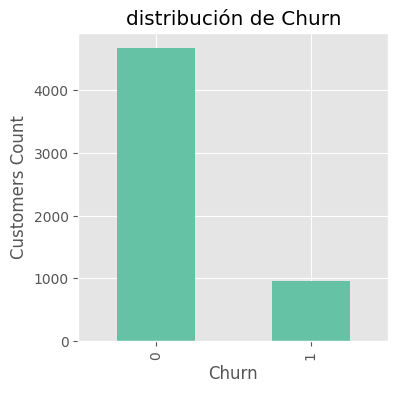

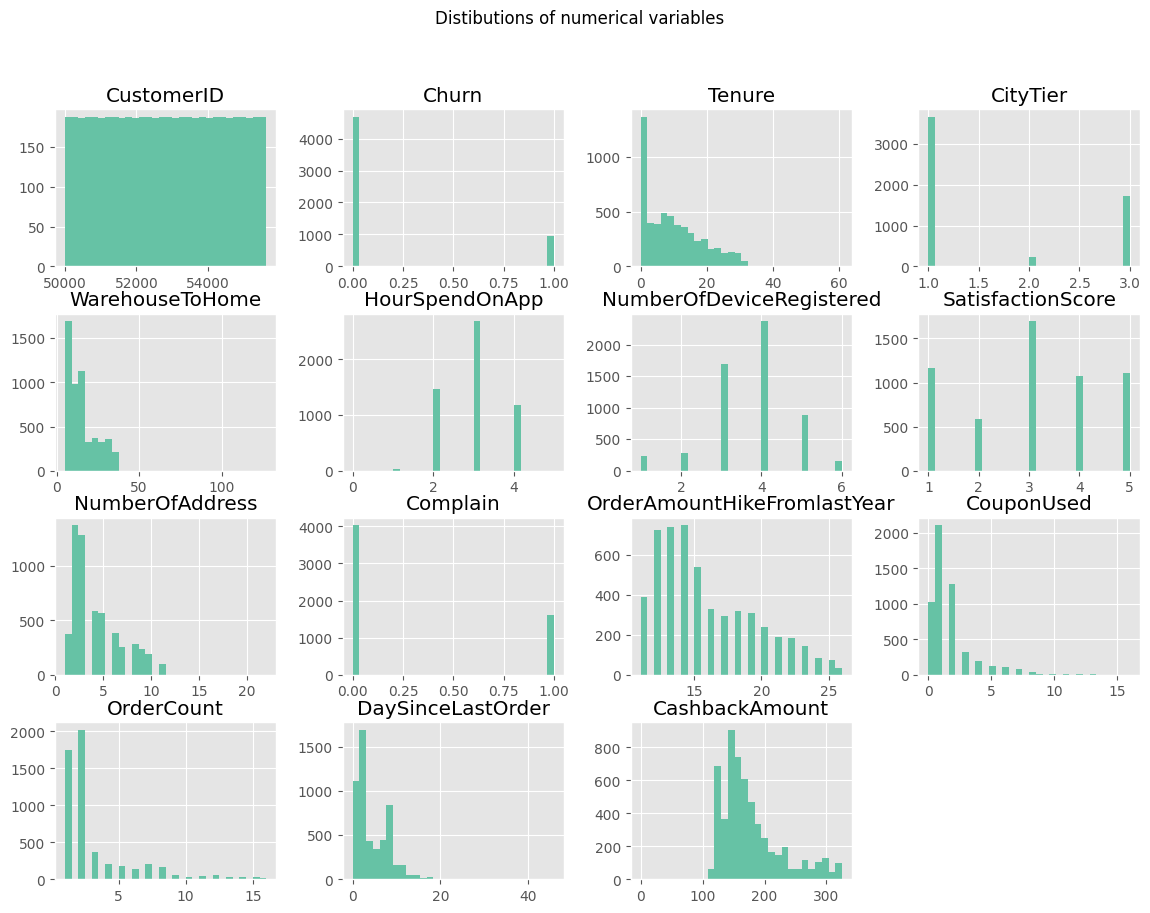

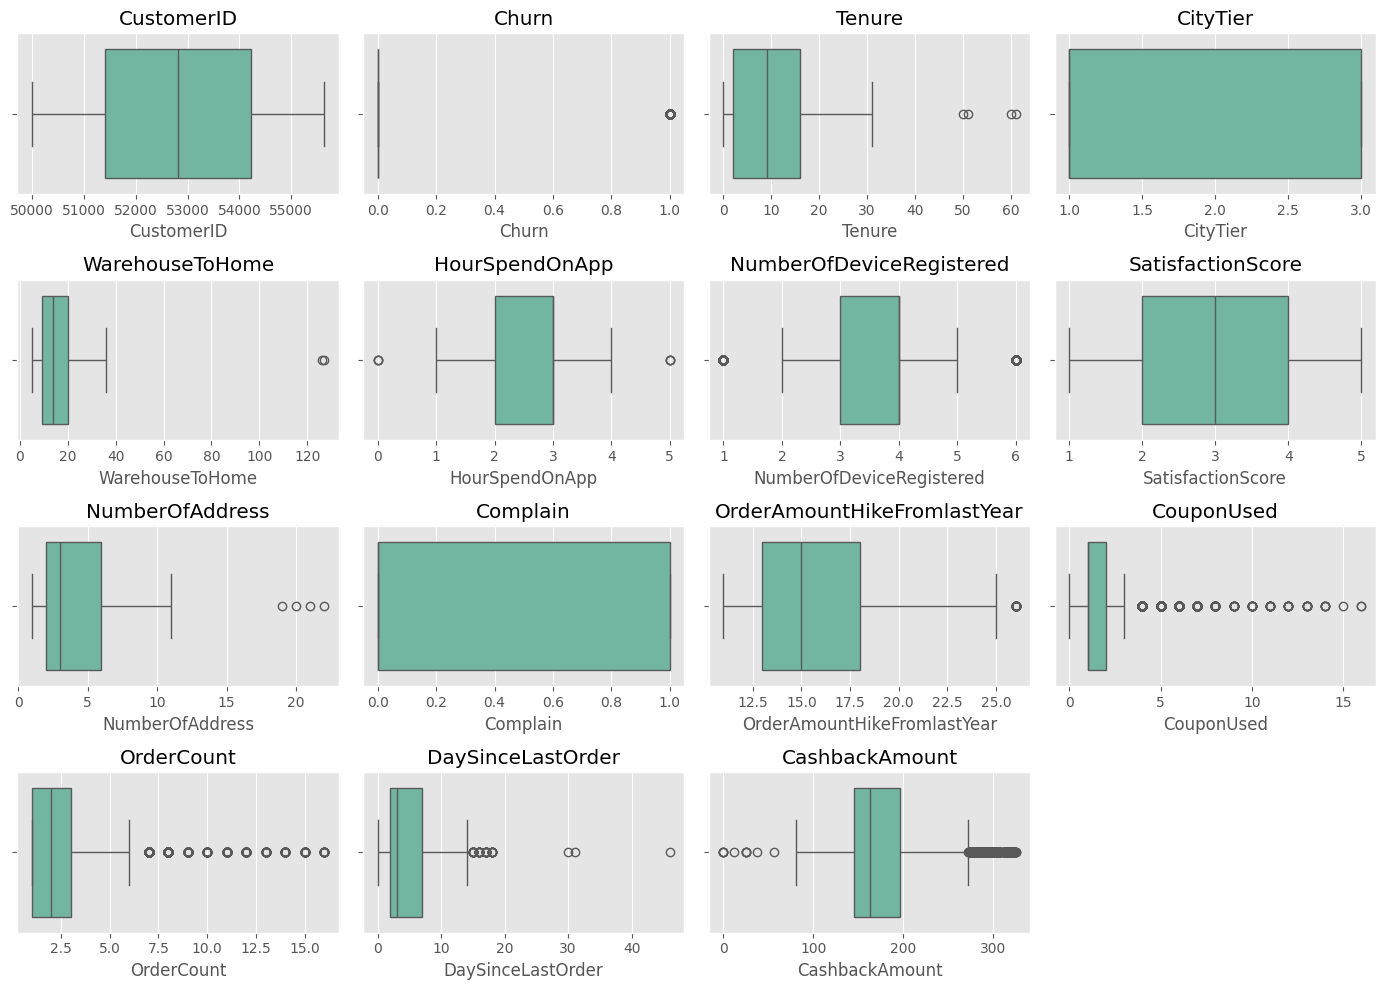

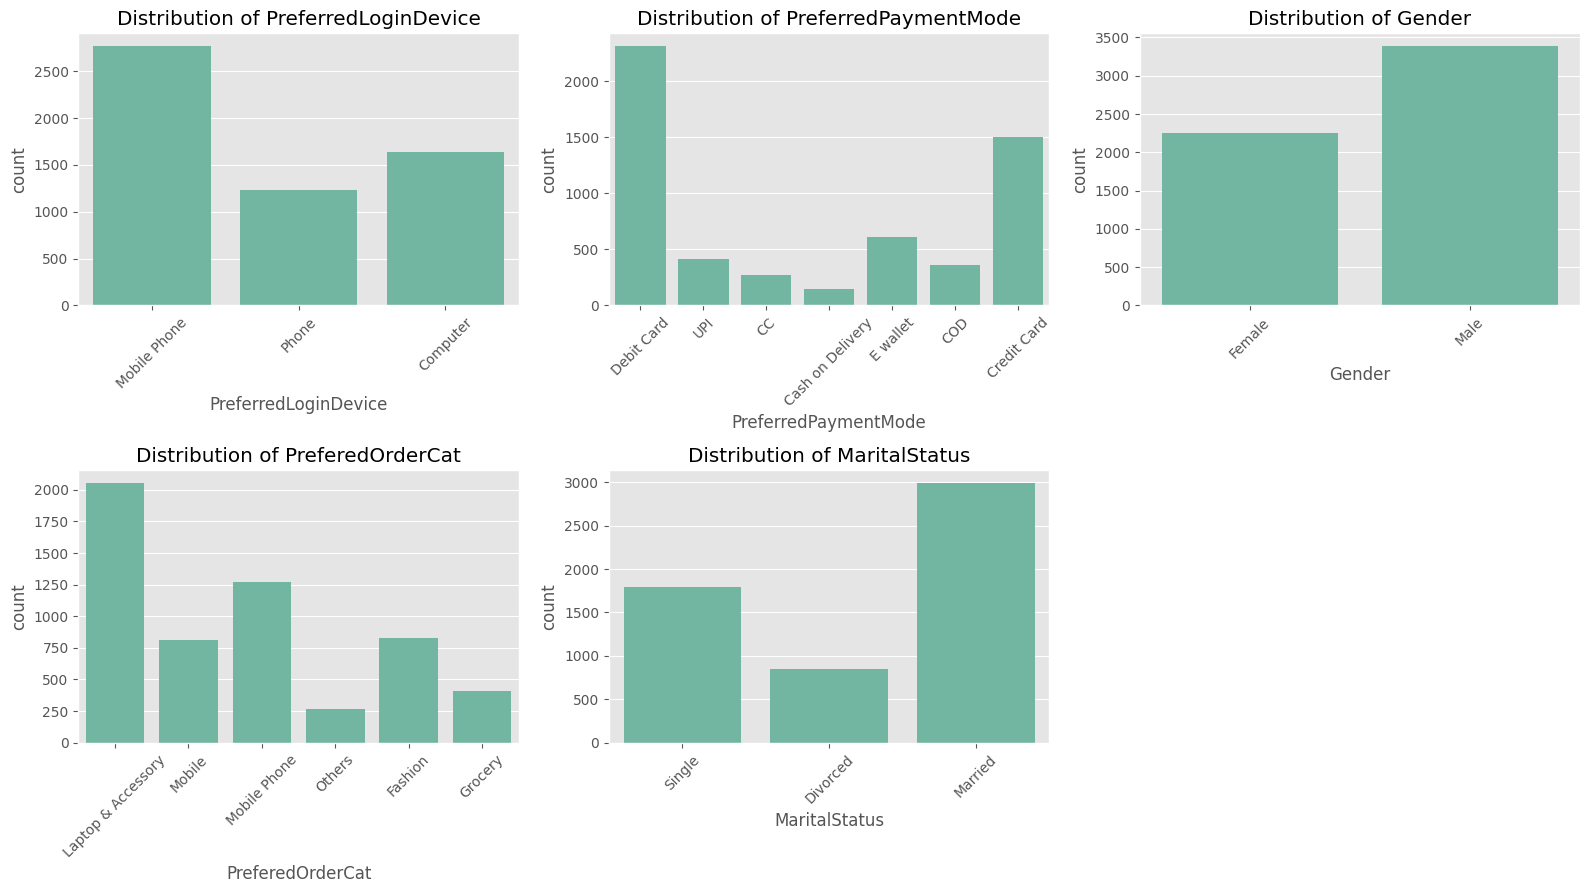

In [4]:
#  Exploratory Data Analysis
# ==========================================================

# Data distribution of target variable 'Churn'
plt.figure(figsize=(4,4))
data['Churn'].value_counts().plot(kind='bar')
plt.title("distribución de Churn")
plt.xlabel("Churn")
plt.ylabel("Customers Count")
plt.show()

# Distibutions of numerical variables
num_cols = data.select_dtypes(include=['float64', 'int64']).columns

data[num_cols].hist(figsize=(14, 10), bins=30, layout=(4, 4))
plt.suptitle("Distibutions of numerical variables")
plt.show()

# Detecting outliers with boxplots
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Categorical variable distributions
cat_cols = data.select_dtypes(include=['object']).columns
rows, cols = 3, 3
n_plots = rows * cols
cat_list = list(cat_cols)
fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
axes_flat = axes.flatten()

for ax, col in zip(axes_flat, cat_list[:n_plots]):
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.tick_params(axis='x', rotation=45)

for ax in axes_flat[len(cat_list[:n_plots]):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

- Most numerical variables are skewed and contain extreme outliers: WarehouseToHome, CouponUsed, OrderCount, and CashbackAmount.
-The target variable Churn is imbalanced.
- Multiple features show missing values, particularly Tenure, HourSpendOnApp, OrderAmountHikeFromlastYear, and DaySinceLastOrder.
- Categorical variables such as PreferredLoginDevice, PaymentMode, OrderCategory, and MaritalStatus have uneven distributions dominated by one or two categories. Also it has weird or ambigupos vategories like Mobile Phone, Phone or Credit Card and CC.

### **Data Cleaning**
- Handle missing values by either imputing them with appropriate statistics (mean, median, mode) or removing rows/columns with excessive missing data.

In [5]:
# Displaying information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
# Detecting rows with more than 50% missing values
threshold = len(data.columns) * 0.5
rows_with_many_nans = data[data.isnull().sum(axis=1) > threshold]
rows_with_many_nans

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount


We will validate the data for duplicates and irrelevant columns.

- CustomerID: Unique identifier; no predictive information; hurts generalization.

In [7]:
# Deleting duplicates to ensure data integrity.
data = data.drop_duplicates()

#Removing columns that are not needed for analysis.
data = data.drop(columns=['CustomerID'])


#### IMPUTATION AND CLEANING 

In [8]:
# Numeric columns to impute
cols_to_impute = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp',
    'OrderAmountHikeFromlastYear', 'CouponUsed', 
    'OrderCount', 'DaySinceLastOrder'
]

for col in cols_to_impute:
    data[col].fillna(data[col].median(), inplace=True)

# Replacing odd categorical values for consistency
data['PreferredLoginDevice'] = data['PreferredLoginDevice'].replace({
    'Phone': 'Mobile Phone'
})

data['PreferredPaymentMode'] = data['PreferredPaymentMode'].replace({
    'CC': 'Credit Card',
    'E wallet': 'E-Wallet',
})

data['PreferedOrderCat'] = data['PreferedOrderCat'].replace({
    'Mobile': 'Mobile Phone'
})

#### DELETING OUTLIERS USING IQR METHOD

In [9]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers, lower, upper

for col in data.select_dtypes(include=['float64', 'int64']).columns:
    if col == 'Churn':   # skip target
        continue
    outliers, low, up = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")


Tenure: 4 outliers
CityTier: 0 outliers
WarehouseToHome: 2 outliers
HourSpendOnApp: 6 outliers
NumberOfDeviceRegistered: 397 outliers
SatisfactionScore: 0 outliers
NumberOfAddress: 4 outliers
Complain: 0 outliers
OrderAmountHikeFromlastYear: 33 outliers
CouponUsed: 629 outliers
OrderCount: 703 outliers
DaySinceLastOrder: 62 outliers
CashbackAmount: 438 outliers


In [10]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

clean_df = data.copy()
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    if col == 'Churn':   # skip target
        continue
    clean_df = remove_outliers_iqr(clean_df, col)

### **EDA after Cleaning**

Dataset Overview: 
- Check shape, head, summary statistics, and missing values.
- Target Distribution: Plot churn frequency.
- Numeric Features: Visualize distributions using histograms and detect outliers with boxplots.
- Categorical Features: Use countplots to explore category frequencies.

Feature Relationships:
- Numeric vs. Churn → Boxplots
- Categorical vs. Churn → Countplots
- Correlations: Generate a heatmap to identify relationships between numerical variables.

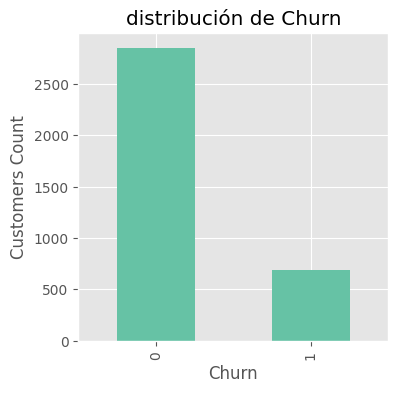

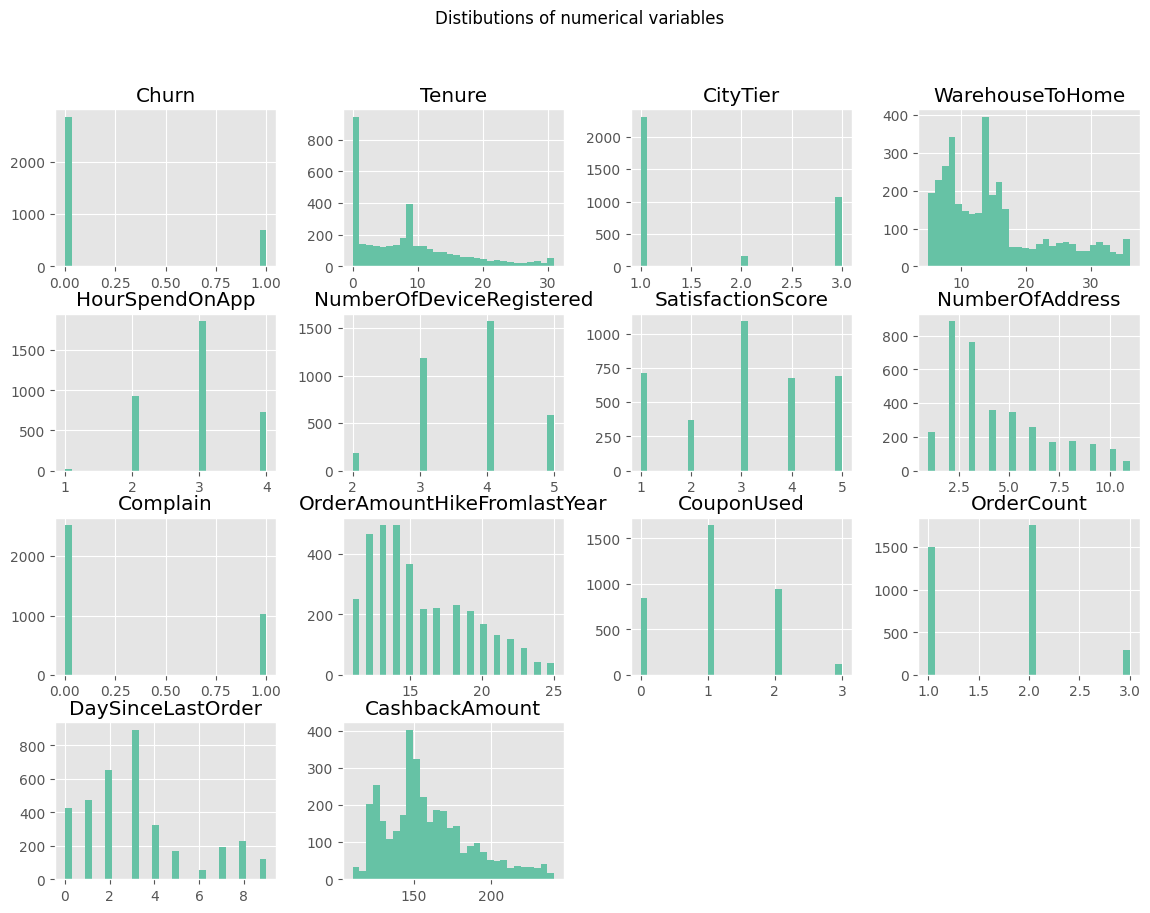

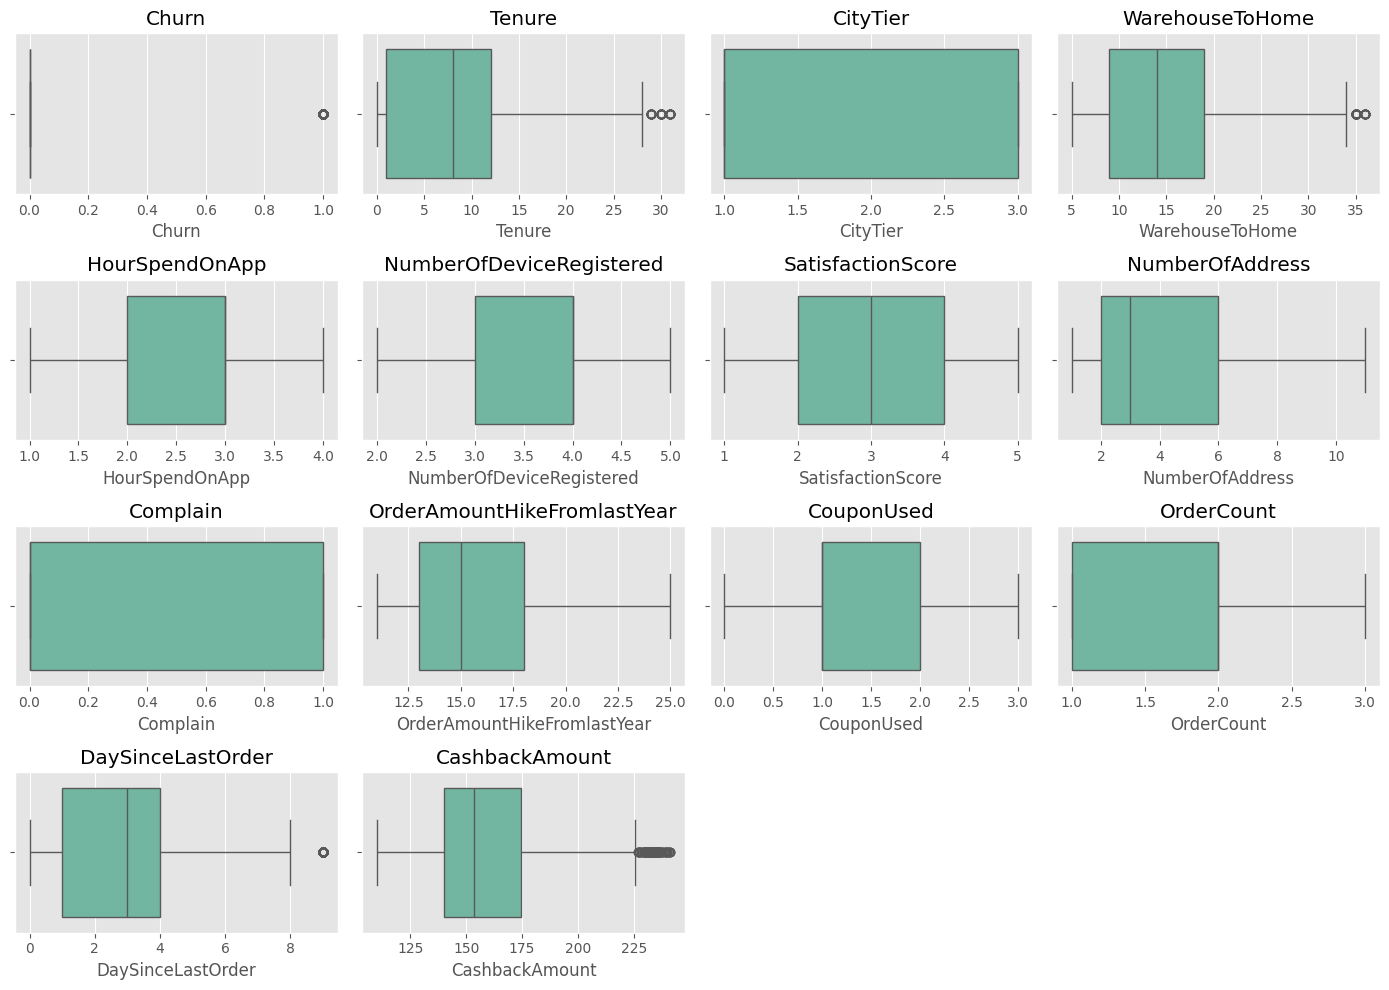

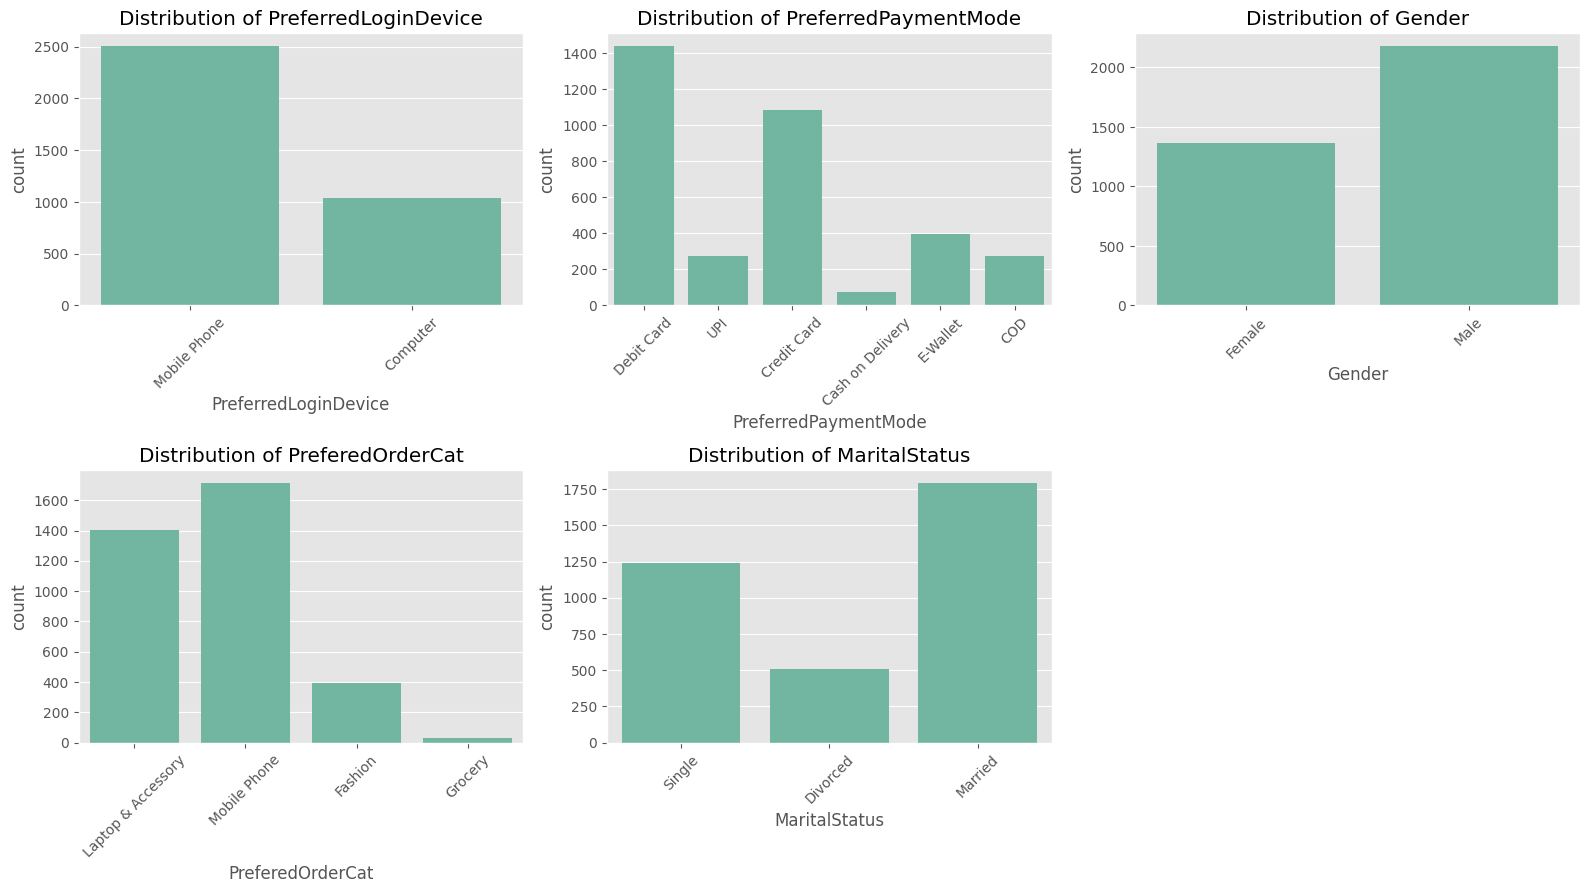

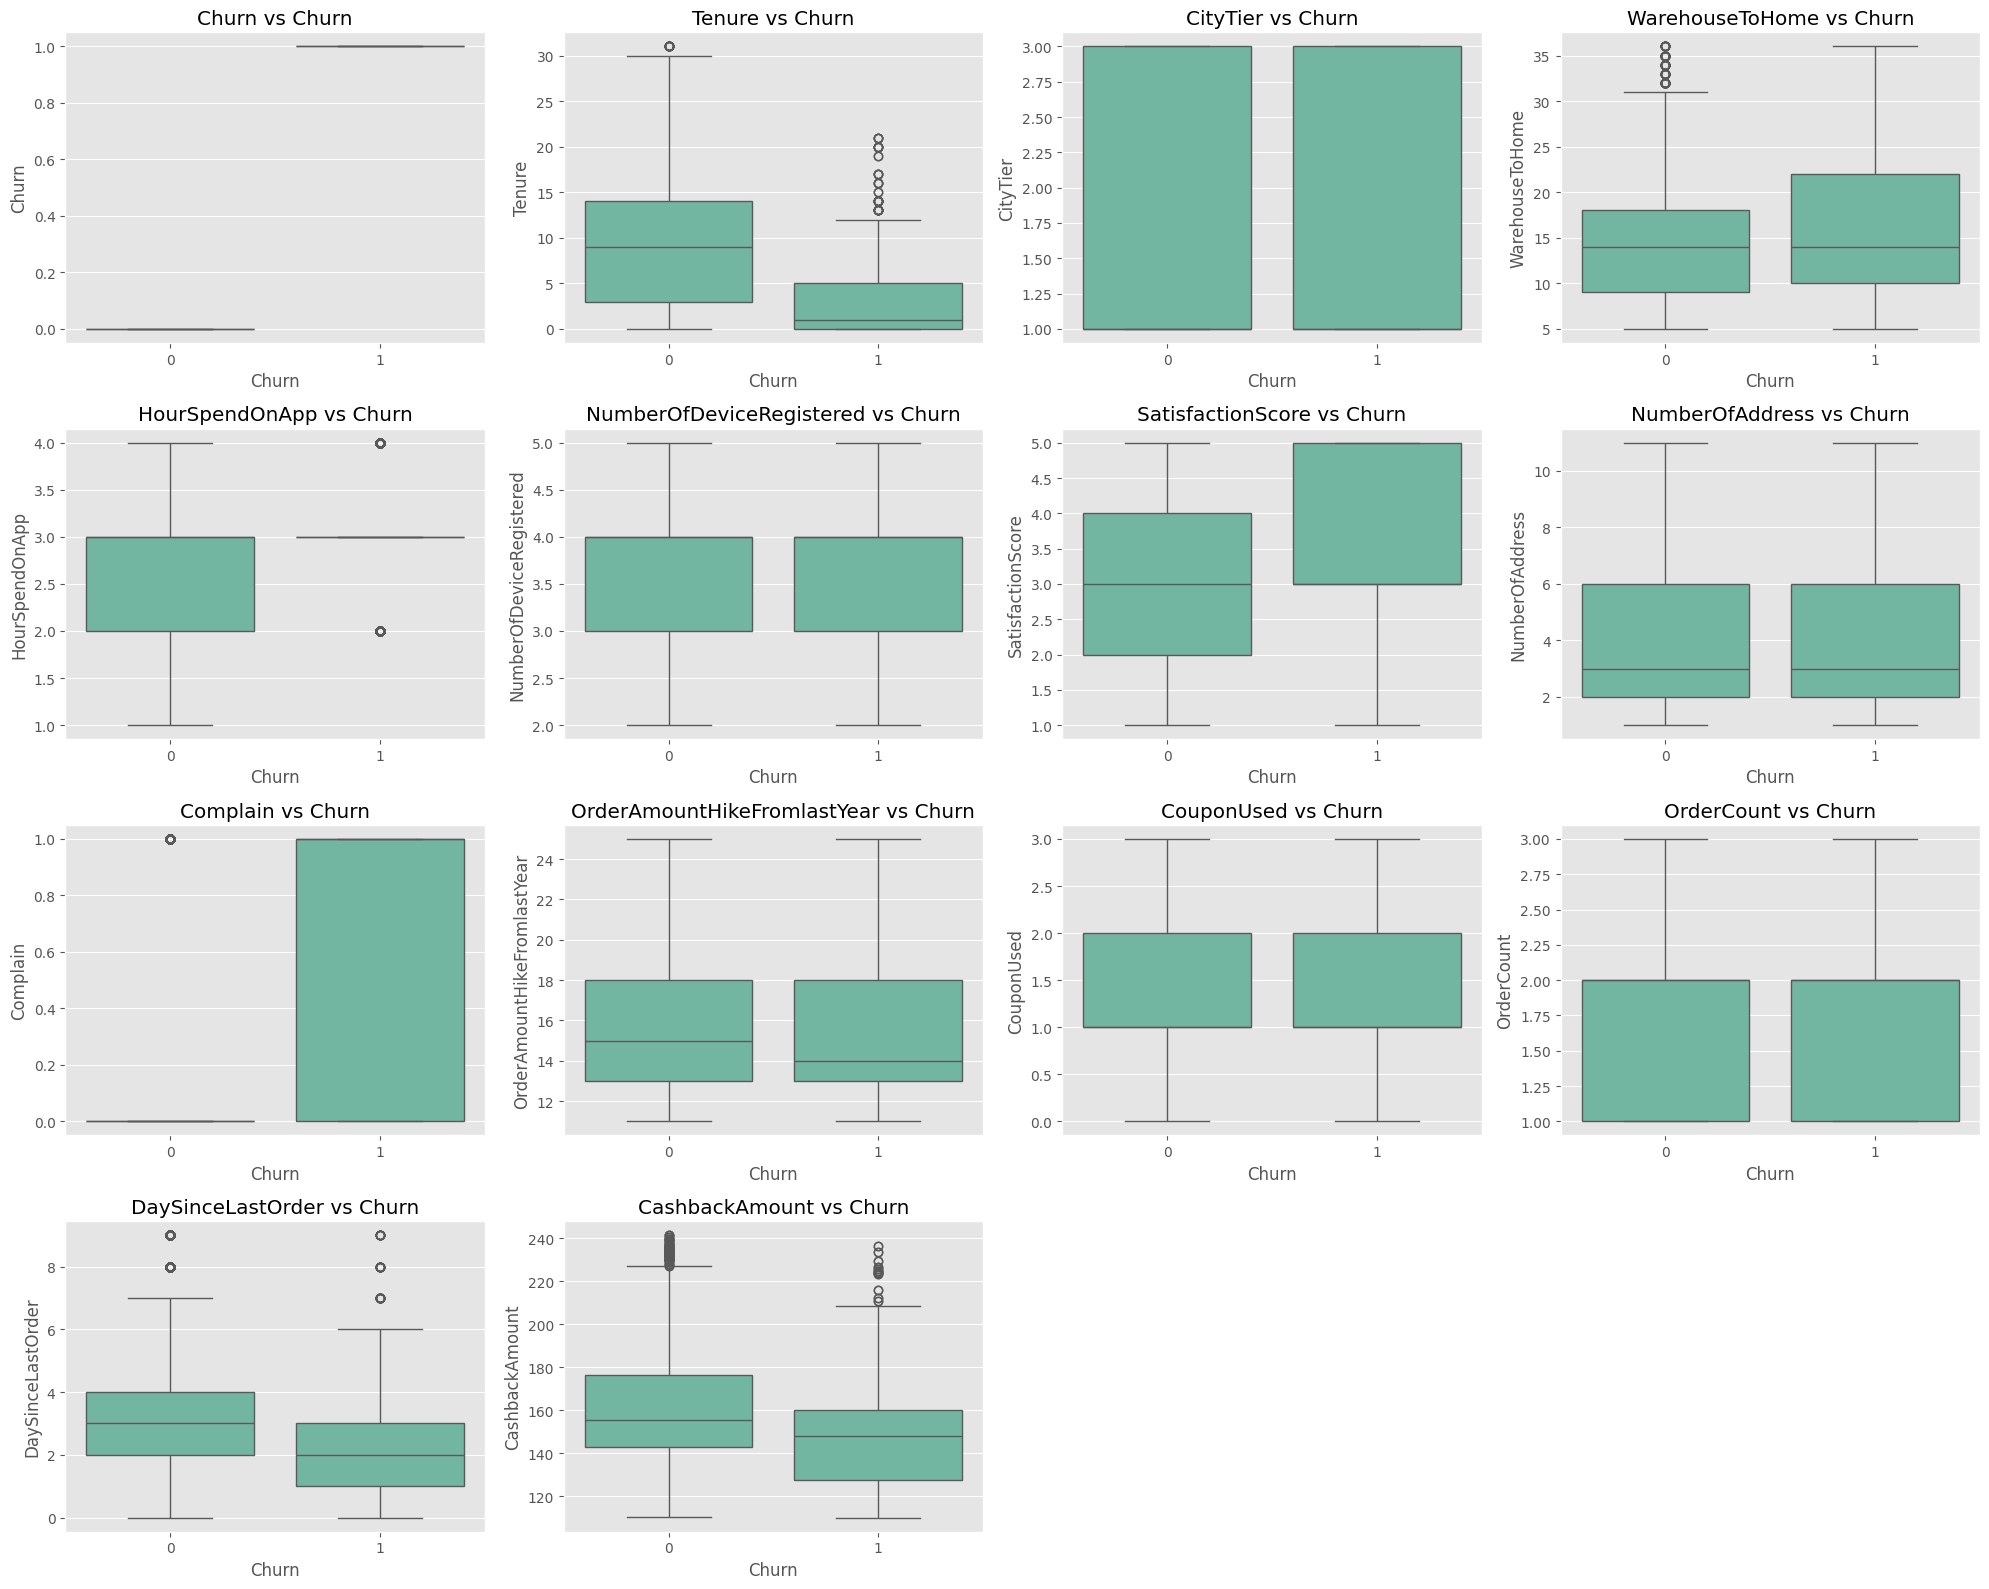

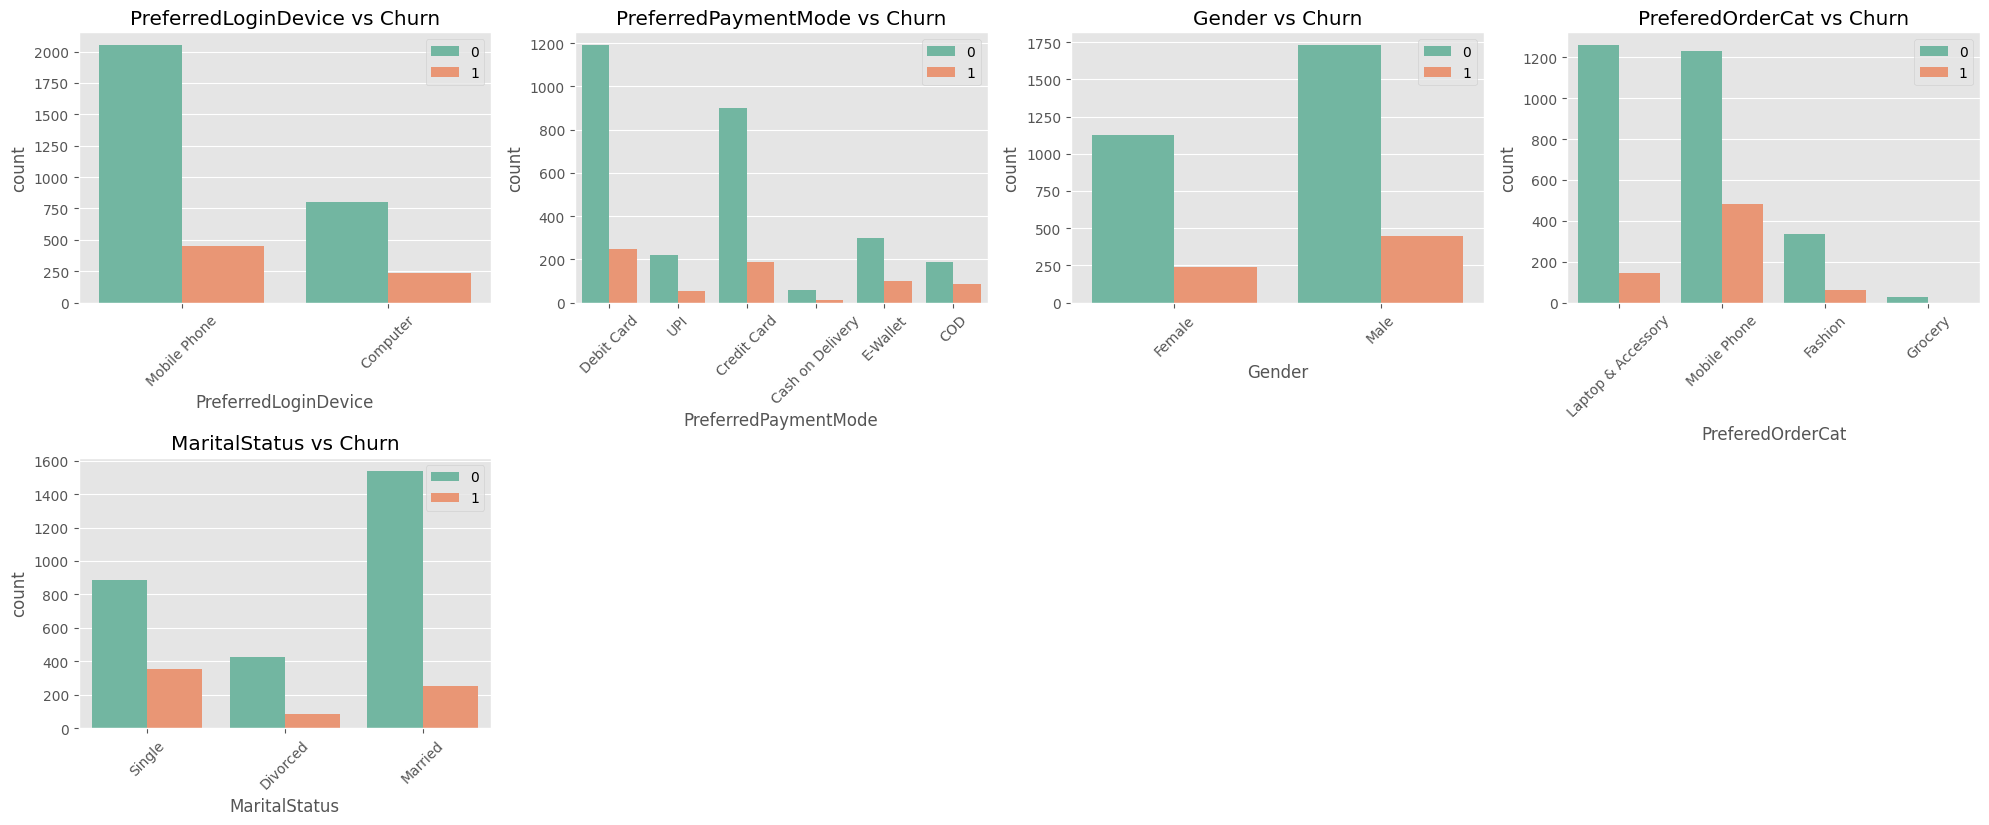

In [11]:
#  Exploratory Data Analysis
# ==========================================================

# Data distribution of target variable 'Churn'
plt.figure(figsize=(4,4))
clean_df['Churn'].value_counts().plot(kind='bar')
plt.title("distribución de Churn")
plt.xlabel("Churn")
plt.ylabel("Customers Count")
plt.show()

# Distibutions of numerical variables
num_cols = clean_df.select_dtypes(include=['float64', 'int64']).columns

clean_df[num_cols].hist(figsize=(14, 10), bins=30, layout=(4, 4))
plt.suptitle("Distibutions of numerical variables")
plt.show()

# Detecting outliers with boxplots
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=clean_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Categorical variable distributions
cat_cols = clean_df.select_dtypes(include=['object']).columns
rows, cols = 3, 3
n_plots = rows * cols
cat_list = list(cat_cols)

fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
axes_flat = axes.flatten()

for ax, col in zip(axes_flat, cat_list[:n_plots]):
    sns.countplot(data=clean_df, x=col, ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.tick_params(axis='x', rotation=45)

for ax in axes_flat[len(cat_list[:n_plots]):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

# Relationships between features and Churn
rows, cols = 4, 4
n_plots = rows * cols
num_list = list(num_cols)

# numerical vs Churn
fig, axes = plt.subplots(rows, cols, figsize=(20, 16))
axes_flat = axes.flatten()

for ax, col in zip(axes_flat, num_list[:n_plots]):
    sns.boxplot(x='Churn', y=col, data=clean_df, ax=ax)
    ax.set_title(f"{col} vs Churn")
    ax.tick_params(axis='x', rotation=0)

for ax in axes_flat[len(num_list[:n_plots]):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

# Categorical vs Churn
fig, axes = plt.subplots(rows, cols, figsize=(20, 16))
axes_flat = axes.flatten()

for ax, col in zip(axes_flat, cat_list[:n_plots]):
    sns.countplot(data=clean_df, x=col, hue='Churn', ax=ax)
    ax.set_title(f"{col} vs Churn")
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc='upper right')

for ax in axes_flat[len(cat_list[:n_plots]):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


- Churn is highly imbalanced, indicating the need for class balancing strategies during modeling.
- Tenure, DaySinceLastOrder, SatisfactionScore, and Complain show strong separation between churn 0 and 1, suggesting they will be key predictors.
- Some numerical variables are skewed and it still contains outliers.
- Customer behavior features (app usage, orders, devices, coupons) display visible differences across churn categories, confirming their predictive value.
- Categorical variables like PreferredPaymentMode, OrderCategory, and MaritalStatus show distinct churn patterns, supporting their inclusion through proper encoding.


ENCODING CATEGORICAL VARIABLES

 - Using One-Hot Encoding for nominal categorical variables with no ordinal relationship.
 - Using Label Encoding for ordinal categorical variables with a clear order.

In [12]:
nominal_cols = [
    'PreferredLoginDevice',
    'PreferredPaymentMode',
    'Gender',
    'PreferedOrderCat',
    'MaritalStatus'
]

ordinal_cols = ['SatisfactionScore', 'CityTier']

# For ordinal encoding
ordinal_encoder = OrdinalEncoder()

clean_df[ordinal_cols] = ordinal_encoder.fit_transform(clean_df[ordinal_cols])

# For nominal encoding
clean_df = pd.get_dummies(clean_df, columns=nominal_cols, drop_first=True)

clean_df.head()




,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E-Wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,2.0,6.0,3.0,3,1.0,9,1,11.0,...,False,True,False,False,False,False,True,False,False,True
1,1,9.0,0.0,8.0,3.0,4,2.0,7,1,15.0,...,False,False,False,True,True,False,False,True,False,True
2,1,9.0,0.0,30.0,2.0,4,2.0,6,1,14.0,...,False,True,False,False,True,False,False,True,False,True
3,1,0.0,2.0,15.0,2.0,4,4.0,8,0,23.0,...,False,True,False,False,True,False,True,False,False,True
4,1,0.0,0.0,12.0,3.0,3,4.0,3,0,11.0,...,True,False,False,False,True,False,False,True,False,True


### **Feature Engineering**

- Activity Ratio: Ratio of OrderCount to Tenure to capture customer activity level.
_Detects customers with long tenure but low activity._
- Order Frequency: Average time between orders (DaySinceLastOrder / OrderCount) to reflect ordering habits.
_Customers that order with less frequency may be more likely to churn._ 
- Complaint Rate: Binary feature indicating if a customer has complained (Complain > 0) to capture dissatisfaction.
_A new customer with complaints may be more likely to churn._

In [13]:
# Feature Engineering: 

# 1. Activity Ratio
clean_df['activity_ratio'] = clean_df['HourSpendOnApp'] / (clean_df['Tenure'] + 1)

# 2. Order Frequency
clean_df['order_frequency'] = clean_df['OrderCount'] / (clean_df['DaySinceLastOrder'] + 1)

# 3. Complaint Rate
clean_df['complaint_rate'] = clean_df['Complain'] / (clean_df['Tenure'] + 1)

clean_df.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,MaritalStatus_Married,MaritalStatus_Single,activity_ratio,order_frequency,complaint_rate
0,1,4.0,2.0,6.0,3.0,3,1.0,9,1,11.0,...,False,False,False,True,False,False,True,0.6,0.166667,0.2
1,1,9.0,0.0,8.0,3.0,4,2.0,7,1,15.0,...,True,True,False,False,True,False,True,0.3,1.000000,0.1
2,1,9.0,0.0,30.0,2.0,4,2.0,6,1,14.0,...,False,True,False,False,True,False,True,0.2,0.250000,0.1
3,1,0.0,2.0,15.0,2.0,4,4.0,8,0,23.0,...,False,True,False,True,False,False,True,2.0,0.250000,0.0
4,1,0.0,0.0,12.0,3.0,3,4.0,3,0,11.0,...,False,True,False,False,True,False,True,3.0,0.250000,0.0


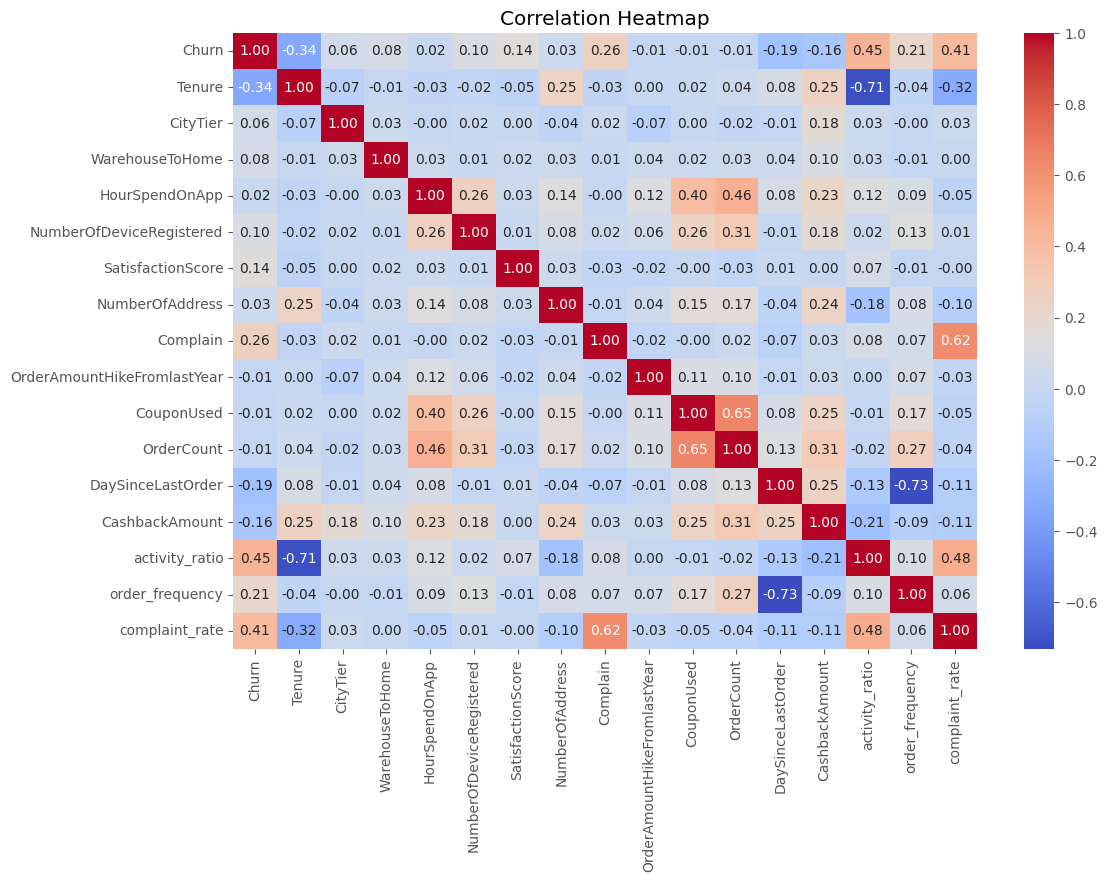

In [14]:
# Distibutions of numerical variables
num_cols = clean_df.select_dtypes(include=['float64', 'int64']).columns

# numeric correlations heatmap with numbers inside cells
plt.figure(figsize=(12,8))
sns.heatmap(clean_df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

About correlations:
- Churn shows the strongest negative correlation with Tenure, confirming that customers with less time in the platform churn more often.
- Complain is the variable most positively correlated with Churn, indicating that customers who file complaints have a substantially higher churn risk.
- DaySinceLastOrder, and CashbackAmount have moderate correlations with Churn, indicating their importance.
- CouponUsed, OrderCount, and HourSpendOnApp are not strongly correlated with Churn, suggesting they may have limited impact on the model.
- The new features Activity Ratio, Order Frequency, and Complaint Rate show strong correlations with Churn, indicating they add predictive value beyond the original variables.

## Model Development


### **Feature Selection**
Keep only the most relevant predictors:
    - Removing ID columns, target, and low-value features based on correlation analysis and EDA.
Also, we remove highly correlated features to reduce multicollinearity.

LOW-VALUE FEATURES REMOVED:
1. OrderAmountHikeFromlastYear
Correlation: –0.01
Behavior does not vary between churn and non-churn

2. NumberOfAddress
Correlation: 0.03
No clear relationship with churn in boxplots

3. WwarehouseToHome
Correlation: 0.08
Low correlation and skewed distribution with outliers

In [15]:

# --- Remove highly correlated features ---
corr_matrix = clean_df[num_cols].corr().abs()

# Upper triangle mask
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Drop features with correlation > 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
clean_df = clean_df.drop(columns=to_drop)

print("Dropped due to high correlation:", to_drop)


drop_low_value = [
    'WarehouseToHome',
    'OrderAmountHikeFromlastYear',
    'NumberOfAddress',
]

clean_df = clean_df.drop(columns=drop_low_value)
print("Dropped due to low importance:", drop_low_value)


Dropped due to high correlation: []
Dropped due to low importance: ['WarehouseToHome', 'OrderAmountHikeFromlastYear', 'NumberOfAddress']


### **Data Normalization**
Scale numeric features to ensure all variables contribute equally during model training.

In [16]:
# Identify numeric columns again after encoding
num_cols = clean_df.select_dtypes(include=['float64', 'int64']).columns
num_cols = num_cols.drop('Churn')

# Initialize scaler
scaler = StandardScaler()

# Scale numeric features
clean_df[num_cols] = scaler.fit_transform(clean_df[num_cols])

### **Train/Test Split**
Divide the dataset into training and testing sets to evaluate performance properly. Here we used stratified sampling to maintain the class distribution of the target variable in both sets.

In [17]:
# Separate target and features
X = clean_df.drop(columns=['Churn'])
y = clean_df['Churn']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (2833, 25)
Test shape: (709, 25)


BALANCE THE TARGET VARIABLE USING OVER-SAMPLING

In [18]:
# Only oversample the training set
ros = RandomOverSampler(random_state=42)

X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)

print("Before balancing:", y_train.value_counts(normalize=True))
print("After balancing:", y_train_bal.value_counts(normalize=True))

Before balancing: Churn
0    0.80586
1    0.19414
Name: proportion, dtype: float64
After balancing: Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


### **Model Selection - Pipeline**
Logistic → Tree → Random Forest → Gradient Boosting

Yoon, S., Koehler, J., & Ghobarah, A. (2010). Prediction of advertiser churn for Google AdWords. JSM Proceedings, American Statistical Association. Recuperado de https://research.google/pubs/prediction-of-advertiser-churn-for-google-adwords/

#### Logistic Regression (L1 Penalized)

A simple, interpretable linear model that performs variable selection through L1 regularization (similar to LASSO).

In [19]:
# L1 Logistic Regression
logreg = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    C=0.1,               
    class_weight="balanced",
    max_iter=1000
)

pipeline = Pipeline([
    ('oversample', RandomOverSampler(random_state=42)),
    ('model', logreg)
])

print("L1 Logistic Regression Results:")
for m in ["accuracy", "precision", "recall"]:
    score = cross_val_score(pipeline, X, y, cv=2, scoring=m).mean()
    print(f"{m.capitalize()}: {score:.4f}")


L1 Logistic Regression Results:
Accuracy: 0.8176
Precision: 0.5247
Recall: 0.8183


#### Decision Tree (C4.5-like)
A classic decision tree for non-linear relationships.
(C4.5 is traditionally from RWeka; scikit-learn’s DecisionTreeClassifier is the closest equivalent.)

In [20]:
tree = DecisionTreeClassifier(
    criterion="entropy",
    min_samples_leaf=2,
    max_depth=6, 
    random_state=42
)

pipeline = Pipeline([
    ('oversample', RandomOverSampler(random_state=42)),
    ('model', tree)
])

print("\nDecision Tree Results:")
for m in ["accuracy", "precision", "recall"]:
    score = cross_val_score(pipeline, X, y, cv=2, scoring=m).mean()
    print(f"{m.capitalize()}: {score:.4f}")


Decision Tree Results:
Accuracy: 0.7761
Precision: 0.4685
Recall: 0.6090


#### Random Forest
An ensemble of multiple decision trees.
Robust, reduces overfitting, and often achieves strong performance.

In [21]:

rf = RandomForestClassifier(
    n_estimators=1000,
    max_features="log2",
    min_samples_leaf=2,
    class_weight="balanced",
    criterion="entropy",
    random_state=42,
    max_depth=8
)

pipeline = Pipeline([
    ('oversample', RandomOverSampler(random_state=42)),
    ('model', rf)
])

print("\nRandom Forest Results:")
for m in ["accuracy", "precision", "recall"]:
    score = cross_val_score(pipeline, X, y, cv=2, scoring=m).mean()
    print(f"{m.capitalize()}: {score:.4f}")


Random Forest Results:
Accuracy: 0.8631
Precision: 0.7461
Recall: 0.5436


Gradient Boosting Machine (GBM)

In [ ]:
gbm = GradientBoostingClassifier(
    n_estimators=1500,
    learning_rate=0.01,
    max_depth=2,
    subsample=0.7,
    loss="log_loss",
    random_state=42
)

pipeline = Pipeline([
    ('oversample', RandomOverSampler(random_state=42)),
    ('model', gbm)
])

print("\nGradient Boosting Machine Results:")
for m in ["accuracy", "precision", "recall"]:
    score = cross_val_score(pipeline, X, y, cv=2, scoring=m).mean()
    print(f"{m.capitalize()}: {score:.4f}")


Gradient Boosting Machine Results:
Accuracy: 0.8255
Precision: 0.5626


# **Final Conclusion**

| Model                         | Accuracy | Precision | Recall  |
|------------------------------|----------|-----------|---------|
| L1 Logistic Regression       | 0.8176   | 0.5247    | 0.8183  |
| Decision Tree (C4.5-style)  | 0.7761   | 0.4685    | 0.6090  |
| Random Forest                | 0.8631   | 0.7461    | 0.5436  |
| Gradient Boosting Machine   | 0.8255   | 0.5626    | 0.7020  |

Based on the results, each model shows different strengths.

> Logistic Regression achieved the best recall, meaning it was the most effective at identifying customers likely to churn, although its precision was lower.

> The Decision Tree performs reasonably but is clearly weaker than the ensemble methods.

> Random Forest had the best overall accuracy and precision, but struggled more with recall, which is important in churn prediction. 

> Gradient Boosting offered a balanced performance, achieving both good accuracy and a higher recall than Random Forest.

>Overall, the best model depends on the objective: if catching churners is the priority, Logistic Regression is the strongest; if we want a more stable and precise model, Random Forest performs better.

# **Best Model: Random Forest**
Based on cross-validation results, Random Forest demonstrated the best overall performance due to its highest accuracy and precision, making it the strongest model in terms of general predictive stability.

## Threshold Optimization for the Final Model

Now that Random Forest has been identified as the best overall model, the next step is to improve its ability to detect churners by tuning the decision threshold. This allows us to increase recall beyond what the default 0.5 cutoff provides, which is essential when the goal is to identify as many at-risk customers as possible.

In [ ]:
# 1. Train the final model using the full training pipeline
pipeline.fit(X_train, y_train)

# 2. Get probabilities for the positive class (churn = 1)
y_proba = pipeline.predict_proba(X_test)[:, 1]

print("\nThreshold Tuning for Random Forest\n")

for thr in [0.45, 0.40, 0.35, 0.30]:
    y_pred = (y_proba >= thr).astype(int)
    print(f"Threshold = {thr}")
    print("  Accuracy :", accuracy_score(y_test, y_pred))
    print("  Precision:", precision_score(y_test, y_pred))
    print("  Recall   :", recall_score(y_test, y_pred))


The best trade-off was found at a threshold of 0.35, which significantly boosts recall while maintaining acceptable accuracy and precision.

# **FINAL CHURN MODEL (Random Forest + Oversampling + Threshold)**


In [ ]:

pipeline.fit(X_train, y_train)

final_threshold = 0.35  #

def predict_churn(model, X, threshold=final_threshold):
    proba = model.predict_proba(X)[:, 1]
    return (proba >= threshold).astype(int)

# Evaluate on test set
y_pred_final = predict_churn(pipeline, X_test, threshold=final_threshold)

from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Final Model Performance (Random Forest + Threshold)")
print("Accuracy :", accuracy_score(y_test, y_pred_final))
print("Precision:", precision_score(y_test, y_pred_final))
print("Recall   :", recall_score(y_test, y_pred_final))


FINAL MODEL

In [ ]:
joblib.dump(pipeline, "src/model/final_churn_model.pkl")
